# Multi Linear Regration

# Linear Regression: An Overview

## What is Linear Regression?

Linear regression is a statistical method used to model and analyze the relationship between a dependent variable and one or more independent variables. The simplest form, simple linear regression, involves one dependent and one independent variable, with the relationship modeled by a straight line:

\[ Y = \beta_0 + \beta_1X + \epsilon \]

where:
- \( Y \) is the dependent variable.
- \( X \) is the independent variable.
- \( \beta_0 \) is the y-intercept.
- \( \beta_1 \) is the slope of the line.
- \( \epsilon \) is the error term.

## Pros and Cons of Linear Regression

| Pros                                           | Cons                                                   |
|------------------------------------------------|--------------------------------------------------------|
| Simple and easy to implement                   | Assumes a linear relationship                          |
| Interpretable model coefficients               | Sensitive to outliers                                  |
| Computationally efficient                      | Assumes no multicollinearity among predictors          |
| Useful for understanding relationships         | Can overfit with too many features                     |
| Can be extended to multiple variables (MLR)    | Assumes homoscedasticity (constant variance of errors) |

## Metrics to Validate Linear Regression Models

| Metric                          | Description                                                   |
|---------------------------------|---------------------------------------------------------------|
| **R-squared (R²)**              | Proportion of variance in the dependent variable explained by the model. |
| **Adjusted R-squared**          | Adjusted for the number of predictors in the model, providing a more accurate measure. |
| **Mean Absolute Error (MAE)**   | Average of the absolute differences between predicted and actual values. |
| **Mean Squared Error (MSE)**    | Average of the squared differences between predicted and actual values. |
| **Root Mean Squared Error (RMSE)** | Square root of MSE, providing error in the same units as the dependent variable. |
| **Residual plots**              | Visual checks for patterns in the residuals to assess model fit. |

## Hyperparameters for Better Fit

| Hyperparameter                  | Description                                                   |
|---------------------------------|---------------------------------------------------------------|
| **Learning rate**               | Step size for gradient descent optimization.                  |
| **Regularization parameter (\(\lambda\))** | Controls the amount of regularization to prevent overfitting (e.g., L1 for Lasso, L2 for Ridge). |
| **Polynomial degree**           | Degree of the polynomial for polynomial regression to capture non-linear relationships. |
| **Interaction terms**           | Include product of features to capture interactions between variables. |
| **Feature scaling**             | Standardizing or normalizing features to improve convergence of gradient descent. |

Linear regression is a foundational technique in statistical modeling, offering simplicity and interpretability. By understanding its pros and cons, validating models with appropriate metrics, and fine-tuning hyperparameters, we can enhance its predictive performance and reliability.



In [35]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the dataset
california = fetch_california_housing()
X = pd.DataFrame(california.data, columns=california.feature_names)
y = pd.Series(california.target)


In [36]:
california = fetch_california_housing()
print(california.DESCR)


.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [39]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')


MAE: 0.5332001304956558
MSE: 0.555891598695244
R²: 0.5757877060324511


In [40]:
vif_data = pd.DataFrame()
vif_data['feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)


      feature         VIF
0      MedInc   11.511140
1    HouseAge    7.195917
2    AveRooms   45.993601
3   AveBedrms   43.590314
4  Population    2.935745
5    AveOccup    1.095243
6    Latitude  559.874071
7   Longitude  633.711654


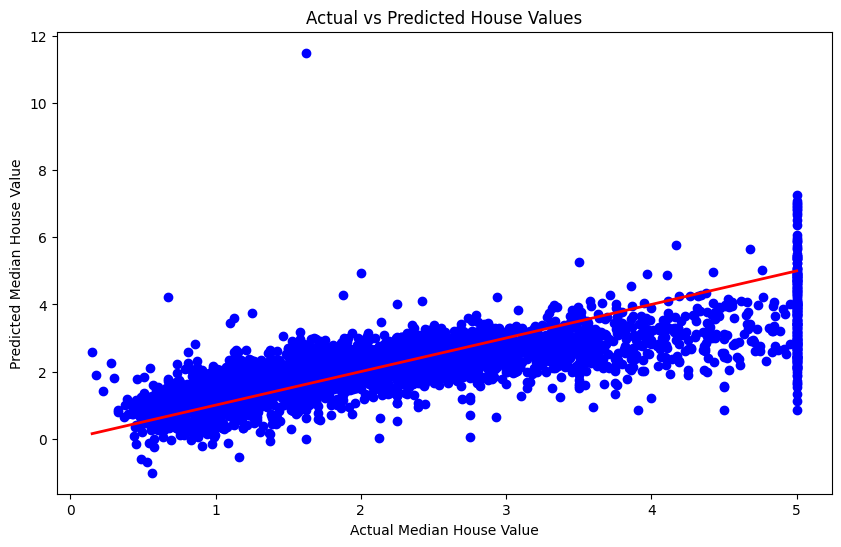

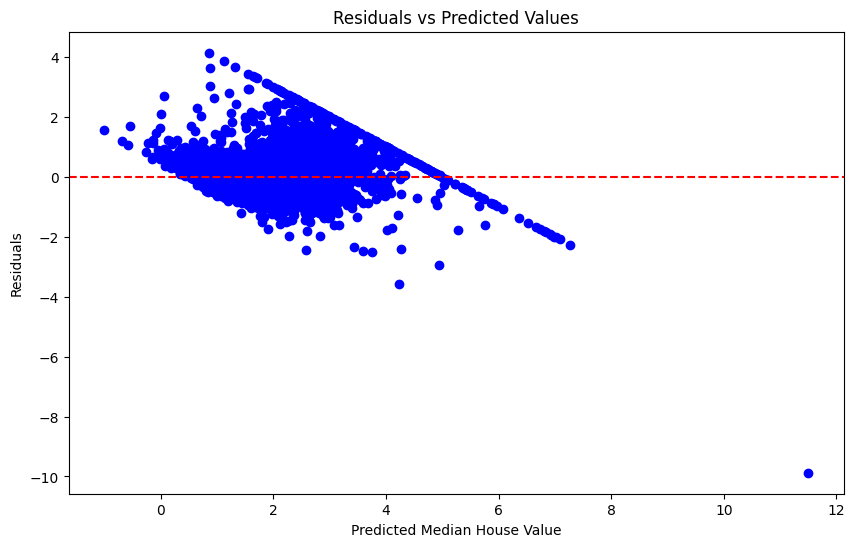

In [41]:
# Scatter plot for predicted vs actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2)
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.title('Actual vs Predicted House Values')
plt.show()

# Residuals plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Median House Value')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()


In [43]:
# drop features wiht high VIF values

X = X.drop(columns=['AveRooms'])


# Split the data again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Rebuild and retrain the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make new predictions and evaluate the model again
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MAE: {mae}')
print(f'MSE: {mse}')
print(f'R²: {r2}')


MAE: 0.5394495201226631
MSE: 0.5504557894103804
R²: 0.5799358837198175
